# Diabetes Dataset Analysis
## Exploratory Data Analysis (EDA) and Visualizations

In this notebook we delve into exploring the Diabetes dataset, through data analysis and visualizations. Our first step involves loading the data conducting exploratory data analysis to grasp the datasets layout and information followed by generating visual representations to examine the connections, among various factors.


In [28]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Append the path to the src folder
sys.path.append(os.path.abspath('../src'))

# Now import the custom modules
from load_data import load_diabetes_data
from eda import perform_eda

# Set the visualization style
sns.set(style="whitegrid")

## 1. Loading the Data

We begin by accessing the dataset through the load_diabetes_data` function, in the `load_data.py` script.


In [40]:
# Load the data
data_path = '../data/diabetes_data.csv'

# Load only necessary columns
columns_to_load = ['Diabetes_012', 'PhysActivity', 'Age', 'Income', 'BMI', 'MentHlth', 'Sex', 'Fruits', 'Veggies', 'PhysHlth']
df = pd.read_csv(data_path, usecols=columns_to_load)

# Display the first few rows of the dataset
df.head()


,Diabetes_012,BMI,PhysActivity,Fruits,Veggies,MentHlth,PhysHlth,Sex,Age,Income
0,0.0,40.0,0.0,0.0,1.0,18.0,15.0,0.0,9.0,3.0
1,0.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0
2,0.0,28.0,0.0,1.0,0.0,30.0,30.0,0.0,9.0,8.0
3,0.0,27.0,1.0,1.0,1.0,0.0,0.0,0.0,11.0,6.0
4,0.0,24.0,1.0,1.0,1.0,3.0,0.0,0.0,11.0,4.0


## 2. Exploratory Data Analysis (EDA)

Lets start by conducting an exploration of the data using the 'perform_eda' function found in the 'eda.py' script. This involves showing the rows of the dataset analyzing its format summarizing statistics and verifying if there are any absent values.


In [41]:
# Perform EDA on the loaded data
perform_eda(df)


First 5 Rows of Data:
   Diabetes_012   BMI  PhysActivity  Fruits  Veggies  MentHlth  PhysHlth  Sex  \
0           0.0  40.0           0.0     0.0      1.0      18.0      15.0  0.0   
1           0.0  25.0           1.0     0.0      0.0       0.0       0.0  0.0   
2           0.0  28.0           0.0     1.0      0.0      30.0      30.0  0.0   
3           0.0  27.0           1.0     1.0      1.0       0.0       0.0  0.0   
4           0.0  24.0           1.0     1.0      1.0       3.0       0.0  0.0   

    Age  Income  
0   9.0     3.0  
1   7.0     1.0  
2   9.0     8.0  
3  11.0     6.0  
4  11.0     4.0  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Diabetes_012  253680 non-null  float64
 1   BMI           253680 non-null  float64
 2   PhysActivity  253680 non-null  float64
 3   Fruits        253680 non-null 

## 3. Data Preparation for Visualizations

Before we start making representations it's important to organize and adjust data columns in the dataset to make them easier to read and analyze.

In [42]:
# Perform necessary mappings and transformations
def map_columns(df):
    df['Diabetes_Status'] = df['Diabetes_012'].map({0.0: 'No Diabetes', 1.0: 'Prediabetes', 2.0: 'Diabetes'})
    df['PhysActivity'] = df['PhysActivity'].map({1: 'Active', 0: 'Non-Active'})
    age_mapping = {
        1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39',
        5: '40-44', 6: '45-49', 7: '50-54', 8: '55-59',
        9: '60-64', 10: '65-69', 11: '70-74', 12: '75-79',
        13: '80+'
    }
    df['Age_Group'] = df['Age'].map(age_mapping)
    income_mapping = {
        1: 'Less than $10,000', 2: '$10,000 - $15,000', 3: '$15,000 - $20,000',
        4: '$20,000 - $25,000', 5: '$25,000 - $35,000', 6: '$35,000 - $50,000',
        7: '$50,000 - $75,000', 8: '$75,000 or more'
    }
    df['Income_Level'] = df['Income'].map(income_mapping)
    df['Sex'] = df['Sex'].map({0.0: 'Female', 1.0: 'Male'})
    return df

# Apply the mappings
df = map_columns(df)


## 4. Visualizations

Lets start by making a representations to investigate the connections, among various factors, in the data.


### 4.1 The Relationship Between Exercise and the Incidence of Diabetes

This bar graph illustrates how physical activity is connected to the prevalence of diabetes, in the community.

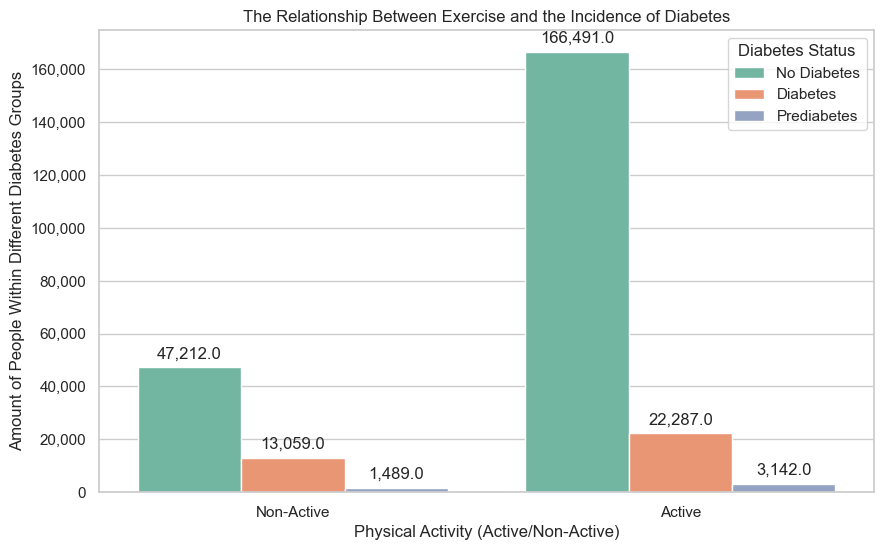

In [44]:
# Now proceed with the plotting code
plt.figure(figsize=(10, 6))
ax1 = plt.gca()
sns.countplot(x='PhysActivity', hue='Diabetes_Status', data=df, palette='Set2', ax=ax1)
ax1.set_title('The Relationship Between Exercise and the Incidence of Diabetes')
ax1.set_xlabel('Physical Activity (Active/Non-Active)')
ax1.set_ylabel('Amount of People Within Different Diabetes Groups')
ax1.legend(title='Diabetes Status')
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
ax1.yaxis.set_major_formatter(formatter)

# Annotate the counts
for p in ax1.patches:
    if p.get_height() > 0:
        ax1.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### 4.2 Count of Age Groups by Diabetes Status

This graph displays how various age groups are distributed among the categories of diabetes status.


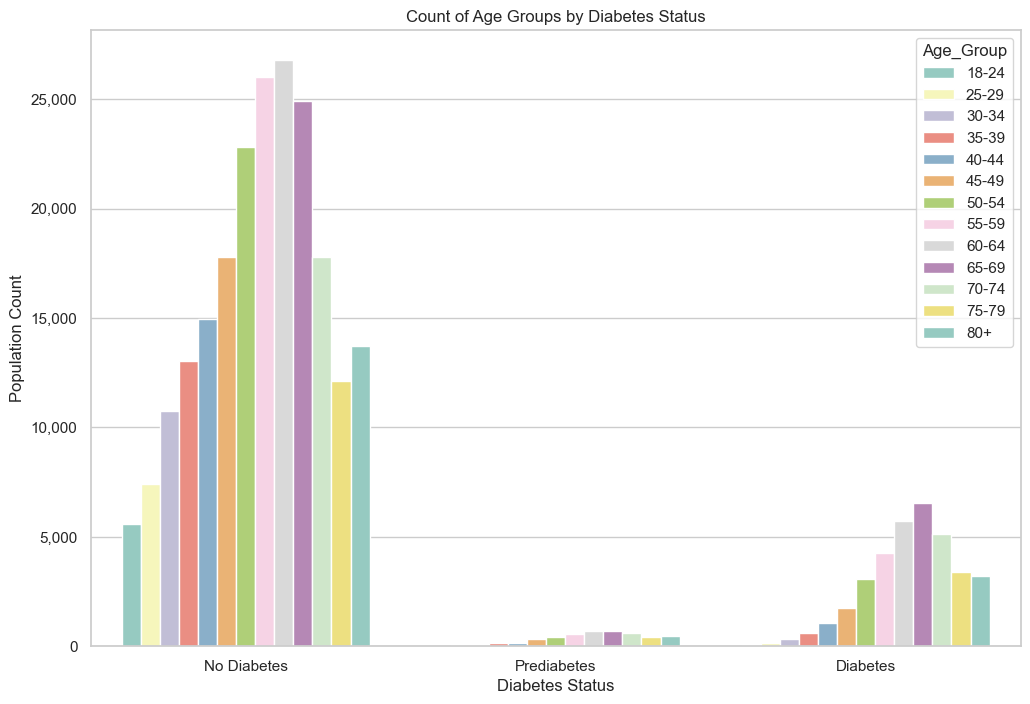

In [45]:
plt.figure(figsize=(12, 8))
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', 
             '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
ax2 = plt.gca()
sns.countplot(x='Diabetes_Status', hue='Age_Group', data=df, order=['No Diabetes', 'Prediabetes', 'Diabetes'], hue_order=age_order, palette='Set3', ax=ax2)
ax2.set_title('Count of Age Groups by Diabetes Status')
ax2.set_xlabel('Diabetes Status')
ax2.set_ylabel('Population Count')
ax2.yaxis.set_major_formatter(formatter)
plt.show()


### 4.3 Average BMI Based by Income Level and Diabetes Status

This heatmap shows the Body Mass Index (BMI), for income brackets and diabetes conditions.

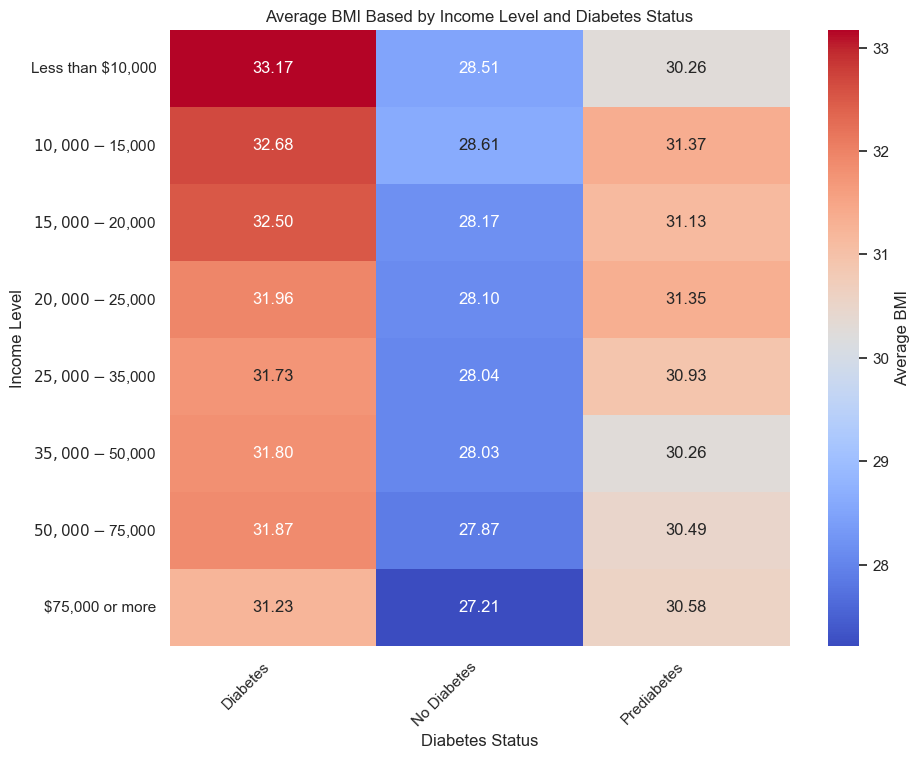

In [46]:
pivot_table = df.pivot_table(values='BMI', index='Income_Level', columns='Diabetes_Status', aggfunc='mean')
pivot_table = pivot_table.reindex(['Less than $10,000', '$10,000 - $15,000', '$15,000 - $20,000',
                                   '$20,000 - $25,000', '$25,000 - $35,000', '$35,000 - $50,000', 
                                   '$50,000 - $75,000', '$75,000 or more'])

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Average BMI'})
plt.title('Average BMI Based by Income Level and Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Income Level')
plt.xticks(rotation=45, ha='right')
plt.show()


### 4.4 Distribution of Mental Health Days Based by Diabetes Status and Gender

This violin plot shows the distribution of poor mental health days in the last 30 days, segmented by diabetes status and gender.


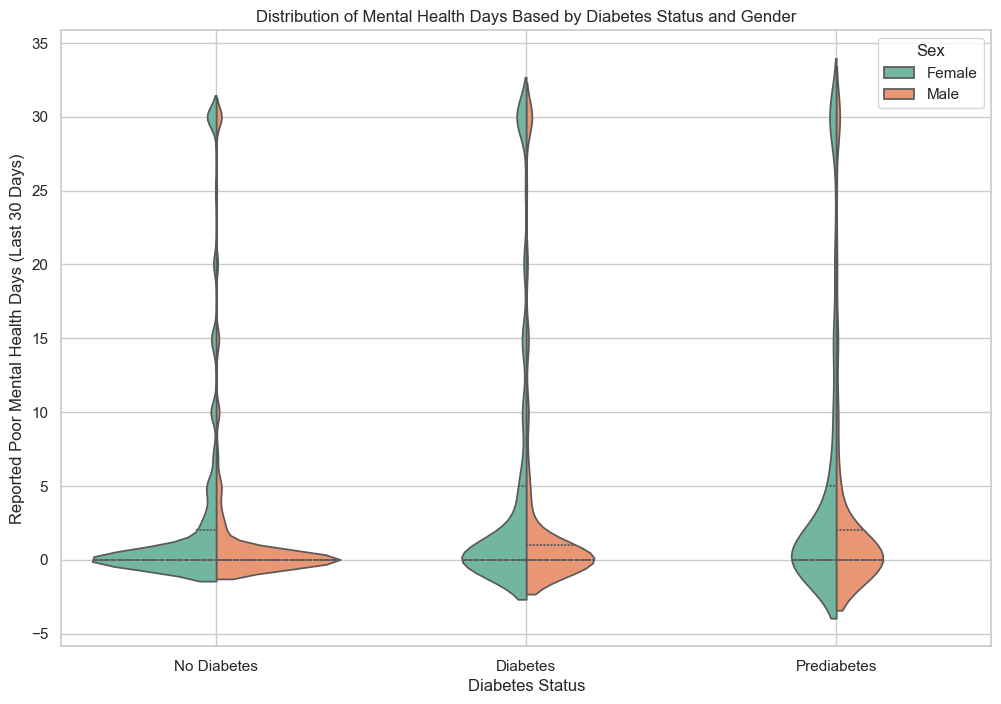

In [47]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Diabetes_Status', y='MentHlth', hue='Sex', data=df, palette='Set2', split=True, inner="quartile")
plt.title('Distribution of Mental Health Days Based by Diabetes Status and Gender')
plt.xlabel('Diabetes Status')
plt.ylabel('Reported Poor Mental Health Days (Last 30 Days)')
plt.grid(True)
plt.show()


### 4.5 Impact of Nutrition and Income on Physical Health Across Diabetes Status

In this part there are four bar graphs that examine how eating habits (specifically consuming fruits and vegetables) and income levels affect well being, in various diabetes conditions.

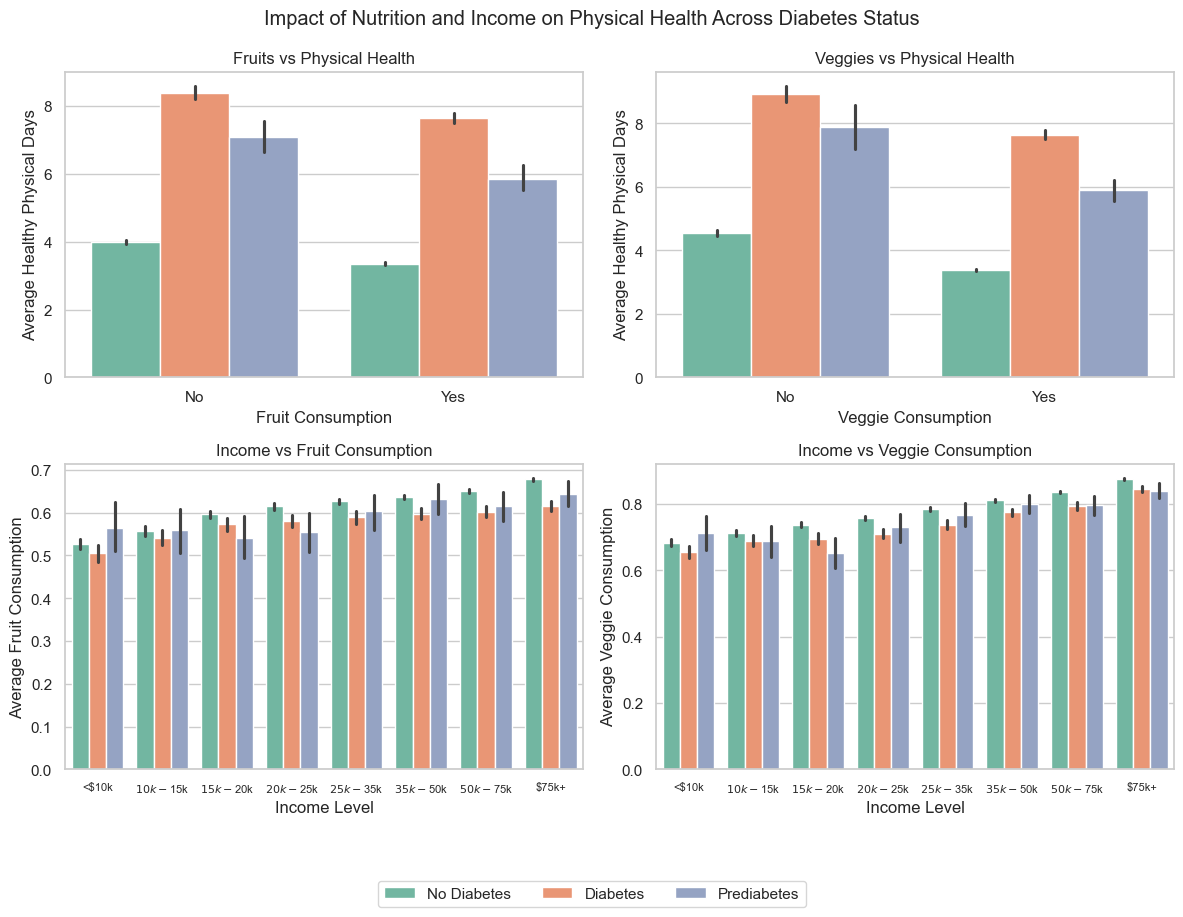

In [48]:
df['Income_Level_Short'] = df['Income'].map({
    1: '<$10k', 2: '$10k-$15k', 3: '$15k-$20k', 4: '$20k-$25k', 
    5: '$25k-$35k', 6: '$35k-$50k', 7: '$50k-$75k', 8: '$75k+'
})

income_order_short = ['<$10k', '$10k-$15k', '$15k-$20k', '$20k-$25k', 
                      '$25k-$35k', '$35k-$50k', '$50k-$75k', '$75k+']

def create_composite_bar_plots(df):
    df_filtered = df[['Fruits', 'Veggies', 'PhysHlth', 'Income_Level_Short', 'Diabetes_Status']].copy()

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    sns.barplot(x='Fruits', y='PhysHlth', hue='Diabetes_Status', palette='Set2', data=df_filtered, ax=axes[0, 0])
    axes[0, 0].set_title('Fruits vs Physical Health')
    axes[0, 0].set_xlabel('Fruit Consumption')
    axes[0, 0].set_ylabel('Average Healthy Physical Days')
    axes[0, 0].set_xticks([0, 1])
    axes[0, 0].set_xticklabels(['No', 'Yes'])

    sns.barplot(x='Veggies', y='PhysHlth', hue='Diabetes_Status', palette='Set2', data=df_filtered, ax=axes[0, 1])
    axes[0, 1].set_title('Veggies vs Physical Health')
    axes[0, 1].set_xlabel('Veggie Consumption')
    axes[0, 1].set_ylabel('Average Healthy Physical Days')
    axes[0, 1].set_xticks([0, 1])
    axes[0, 1].set_xticklabels(['No', 'Yes'])

    sns.barplot(x='Income_Level_Short', y='Fruits', hue='Diabetes_Status', palette='Set2', data=df_filtered, ax=axes[1, 0], order=income_order_short)
    axes[1, 0].set_title('Income vs Fruit Consumption')
    axes[1, 0].set_xlabel('Income Level')
    axes[1, 0].set_ylabel('Average Fruit Consumption')
    axes[1, 0].tick_params(axis='x', labelsize=8)

    sns.barplot(x='Income_Level_Short', y='Veggies', hue='Diabetes_Status', palette='Set2', data=df_filtered, ax=axes[1, 1], order=income_order_short)
    axes[1, 1].set_title('Income vs Veggie Consumption')
    axes[1, 1].set_xlabel('Income Level')
    axes[1, 1].set_ylabel('Average Veggie Consumption')
    axes[1, 1].tick_params(axis='x', labelsize=8)

    plt.tight_layout()
    plt.suptitle("Impact of Nutrition and Income on Physical Health Across Diabetes Status", y=1.03)

    handles, labels = axes[0, 0].get_legend_handles_labels()

    for ax in axes.flat:
        if ax.get_legend() is not None:
            ax.get_legend().remove()

    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

    plt.show()

create_composite_bar_plots(df)


## 5. Conclusion

In this notebook a thorough examination of data was conducted, along, with aids to explore the connections among physical activity, age, income, mental well being and diet in relation to diabetes status. The results of this study shed light on how these elementsre linked to diabetes and can guide actions, for managing and preventing the condition.
